<a href="https://colab.research.google.com/github/parth-u/NullClass-App-Store-Data-Analytics/blob/main/Analysis%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

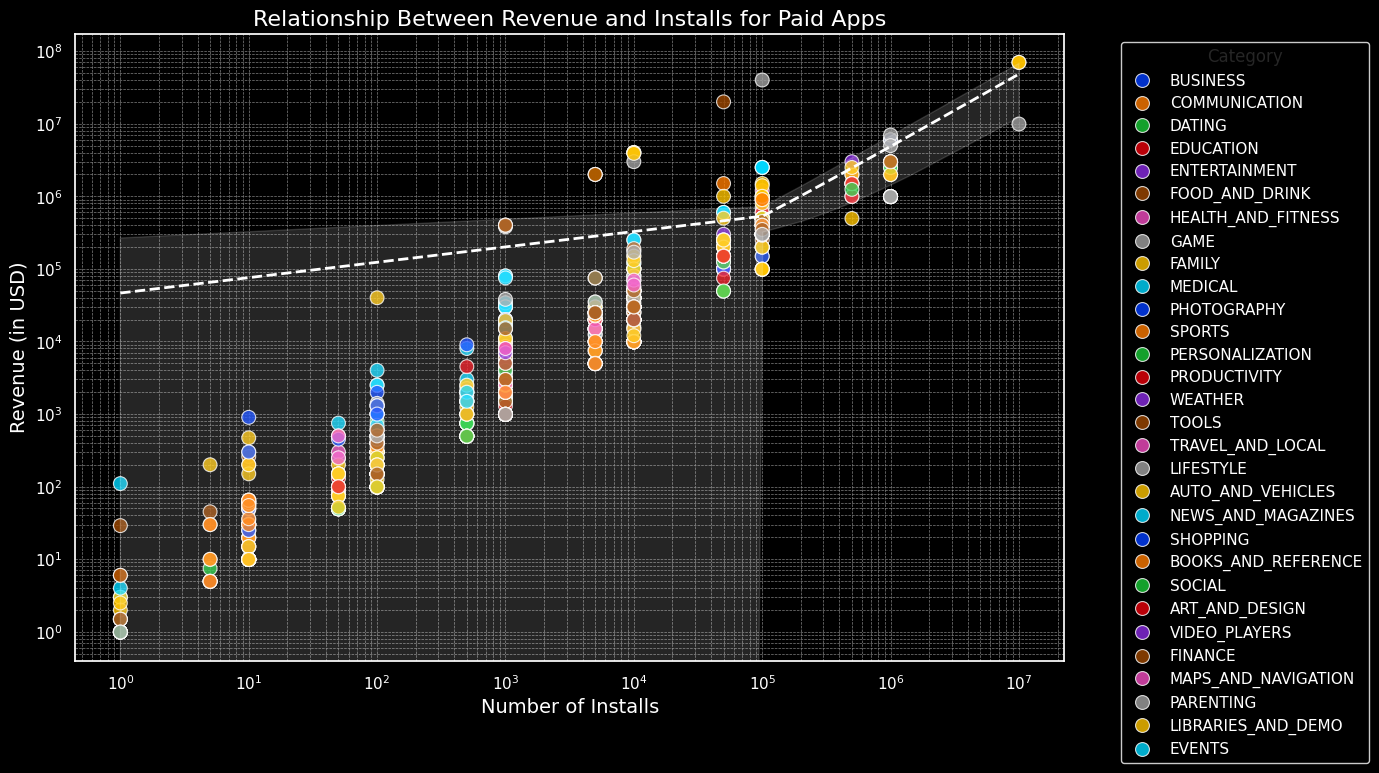

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load the data
data = pd.read_csv('/content/sample_data/Play Store Data.csv')

# Data cleaning and preparation
# Filter for paid apps only
paid_apps = data[data['Type'] == 'Paid'].copy()

# Clean and convert `Installs` and `Price` to numeric values
paid_apps['Installs'] = paid_apps['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False).astype(float)
paid_apps['Price'] = paid_apps['Price'].str.replace('$', '', regex=False).astype(float)

# Calculate revenue
paid_apps['Revenue'] = paid_apps['Installs'] * paid_apps['Price']

# Remove rows with missing or zero values in key columns
paid_apps = paid_apps.dropna(subset=['Revenue', 'Installs', 'Category'])
paid_apps = paid_apps[(paid_apps['Revenue'] > 0) & (paid_apps['Installs'] > 0)]

# Set the aesthetic style of the plot
sns.set(style="darkgrid", palette="bright")

# Create the scatter plot with a black background
plt.figure(figsize=(14, 8), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

scatter = sns.scatterplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    hue='Category',
    palette='bright',  # Use a bright color palette for better differentiation
    alpha=0.8,
    edgecolor='w',
    s=100
)

# Add a trendline
sns.regplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    scatter=False,
    color='white',  # Use white for the trendline to stand out
    line_kws={"linewidth": 2, "linestyle": "dashed"}
)

# Customize the plot
plt.title('Relationship Between Revenue and Installs for Paid Apps', fontsize=16, color='white')
plt.xlabel('Number of Installs', fontsize=14, color='white')
plt.ylabel('Revenue (in USD)', fontsize=14, color='white')
plt.xscale('log')  # Log scale for better visualization of spread
plt.yscale('log')  # Log scale for revenue

# Customize the legend
legend = plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', facecolor='black', edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')

# Customize the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Customize the ticks
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.tight_layout()

# Show the plot
plt.show()